In [2]:
import pandas as pd
import psutil
import plotly.express as px
import numpy as np
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import auc

In [3]:
def usage():
    total, available, percent, used, free_memory = psutil.virtual_memory()
    print("Total Memory: ", total)
    print("Available Memory: ", available)
    print("Used percentage: ", percent)
    print("Used Memory: ", used)
    print("Free memoryu: ", free_memory)


In [4]:
usage()

Total Memory:  34279374848
Available Memory:  20583874560
Used percentage:  40.0
Used Memory:  13695500288
Free memoryu:  20583874560


In [5]:
%%time

# df = pd.read_csv(r"D:\Python\btc\dataset\unzipeed\BTCUSDT-1m\BTCUSDT-1m.csv")
df = pd.read_csv(r"D:\KISHORE\Binance-Data-Downloader\data\extracted_data\BTCUSDT-1m\BTCUSDT-1m.csv")

df.shape

CPU times: total: 1min 42s
Wall time: 4min 34s


(1972772, 583)

In [6]:
import json

with open ("1m_columns.json","r") as fp:
    one_m_columns = json.load(fp)
    
    

In [8]:
len(one_m_columns)

573

In [9]:
set(df.columns) - set(one_m_columns)

{'count',
 'dual_loss',
 'entered_before',
 'entry',
 'if_long',
 'if_short',
 'long_stop_loss',
 'long_target',
 'longs_win_after',
 'open_time',
 'quote_volume',
 'short_stop_loss',
 'short_target',
 'shorts_win_after',
 'taker_buy_quote_volume',
 'taker_buy_volume'}

In [10]:
set(one_m_columns) - set(df.columns)

{'Taker_buy_quote_asset_volume',
 'ignore',
 'number_of_trades',
 'quote_asset_volume',
 'taker_buy_base_asset_volume',
 'time'}

In [11]:
for col in df.columns:
    if col not in one_m_columns:
        print(col)

open_time
quote_volume
count
taker_buy_volume
taker_buy_quote_volume
entry
if_short
if_long
long_target
short_target
long_stop_loss
short_stop_loss
shorts_win_after
longs_win_after
dual_loss
entered_before


In [12]:
for col in one_m_columns:
    if col not in df.columns:
        print(col)

time
quote_asset_volume
number_of_trades
taker_buy_base_asset_volume
Taker_buy_quote_asset_volume
ignore


In [13]:
df.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,...,PLUS_DM_233,ROC_233,ROCP_233,ROCR_233,ROCR100_233,RSI_233,ATR_233,NATR_233,BETA_233,CORREL_233
0,2020-01-01 05:31:00+05:30,7182.43,7182.44,7178.75,7179.01,70.909,2020-01-01 05:31:59.999000+05:30,509145.78482,140,32.597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01 05:32:00+05:30,7179.01,7179.01,7175.25,7177.93,99.420,2020-01-01 05:32:59.999000+05:30,713539.55348,148,16.311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 05:33:00+05:30,7177.77,7182.60,7177.00,7181.11,69.330,2020-01-01 05:33:59.999000+05:30,497793.35929,104,43.723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 05:34:00+05:30,7179.10,7179.10,7172.94,7175.25,97.368,2020-01-01 05:34:59.999000+05:30,698627.39382,193,36.616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01 05:35:00+05:30,7174.71,7177.14,7173.28,7175.61,33.725,2020-01-01 05:35:59.999000+05:30,241979.50880,124,15.885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
usage()

Total Memory:  16952647680
Available Memory:  5890265088
Used percentage:  65.3
Used Memory:  11062382592
Free memoryu:  5890265088


In [5]:
df.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_volume', 'count', 'taker_buy_volume',
       ...
       'PLUS_DM_233', 'ROC_233', 'ROCP_233', 'ROCR_233', 'ROCR100_233',
       'RSI_233', 'ATR_233', 'NATR_233', 'BETA_233', 'CORREL_233'],
      dtype='object', length=583)

In [6]:
df.select_dtypes(include="object").columns

Index(['open_time', 'close_time'], dtype='object')

In [7]:
df.drop(["open_time", "close_time"], axis=1, inplace=True)

In [8]:
df.drop(["entered_before", "longs_win_after", "shorts_win_after"], axis=1, inplace=True)

In [9]:
df.replace(np.nan, -500, inplace=True)

In [10]:
df.if_long.value_counts()

if_long
-1    1280470
 1     692222
 0         80
Name: count, dtype: int64

In [11]:
df["if_long"] = df["if_long"].replace(-1, 0)

In [12]:
df.if_long.value_counts()

if_long
0    1280550
1     692222
Name: count, dtype: int64

In [13]:
df["if_short"] = df["if_short"].replace(-1, 0)

In [14]:
df.if_short.value_counts()

if_short
0    1275151
1     697621
Name: count, dtype: int64

### Long model

In [15]:
df = df.drop("if_short", axis=1)

In [16]:
long_y = df["if_long"]

In [17]:
df = df.drop("if_long", axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df, long_y, test_size=0.3)

In [20]:
usage()

Total Memory:  16952647680
Available Memory:  8574742528
Used percentage:  49.4
Used Memory:  8377905152
Free memoryu:  8574742528


In [21]:
del df
del long_y

In [22]:
usage()

Total Memory:  16952647680
Available Memory:  11075399680
Used percentage:  34.7
Used Memory:  5877248000
Free memoryu:  11075399680


In [23]:
long_clf = RandomForestClassifier(max_depth=100, random_state=0)

In [24]:
%%time

long_clf.fit(X_train, y_train)

CPU times: total: 3h 1min 19s
Wall time: 3h 59min 48s


RandomForestClassifier(max_depth=100, random_state=0)

In [25]:
import pickle

# Save the model to a file
with open("long_clf_100923.pkl", "wb") as f:
    pickle.dump(long_clf, f)

In [27]:
y_pred = long_clf.predict(X_test)

In [28]:
long_clf.score(X_test, y_test)

0.8988969842793225

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=long_clf.classes_)

In [30]:
cm

array([[377706,   6921],
       [ 52915, 154290]], dtype=int64)

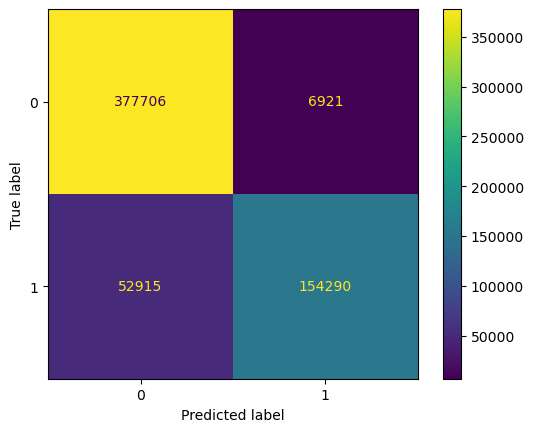

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=long_clf.classes_)

disp.plot()


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93    384627
           1       0.96      0.74      0.84    207205

    accuracy                           0.90    591832
   macro avg       0.92      0.86      0.88    591832
weighted avg       0.91      0.90      0.90    591832



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


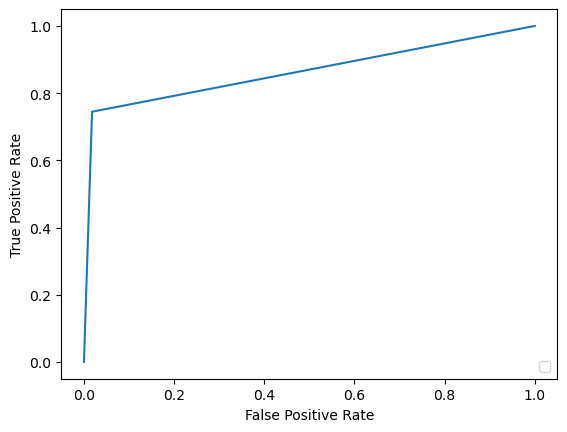

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=long_clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()